In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import xgboost as xgb

In [38]:
data = pd.read_csv("DDoS_Bussines.csv")

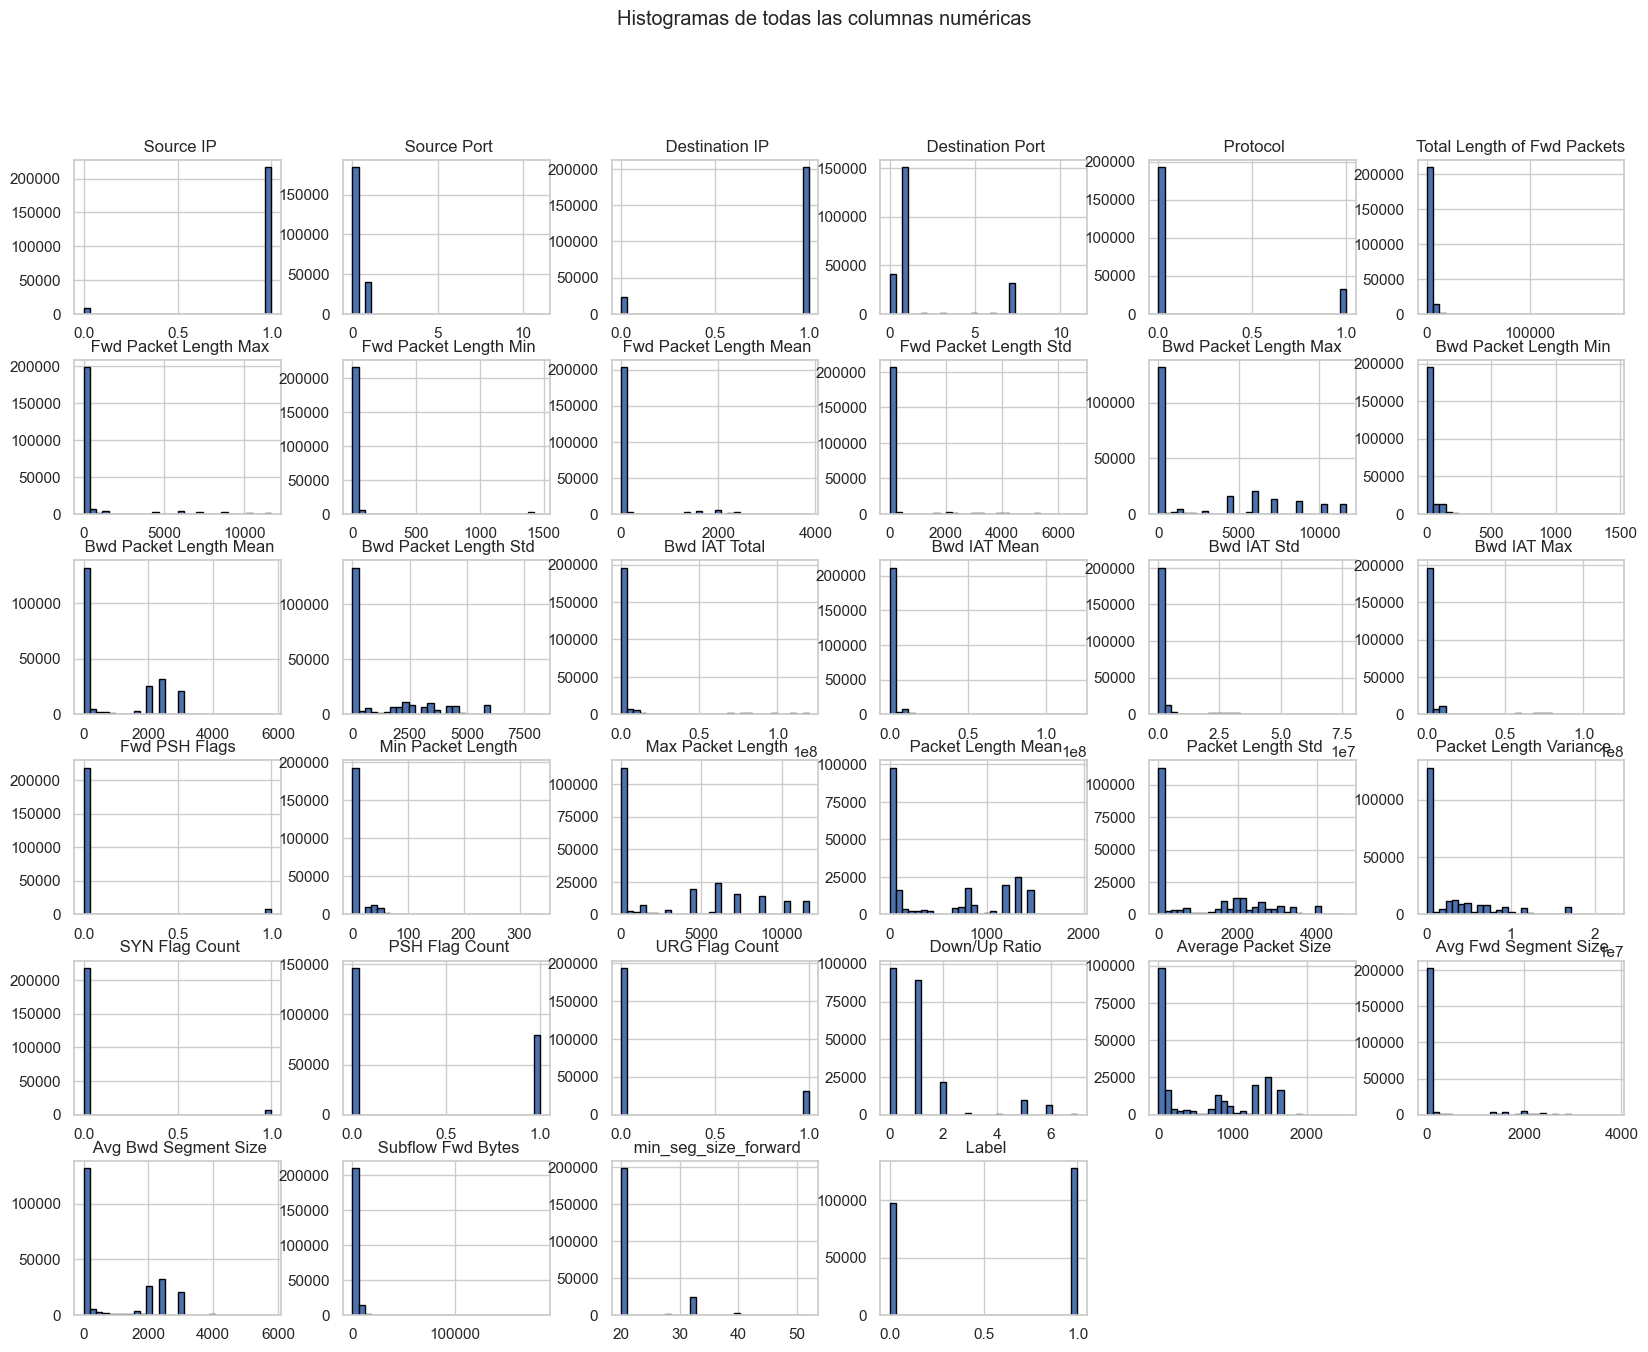

In [39]:
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histogramas de todas las columnas numéricas')
plt.show()

In [46]:
data.columns

Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', 'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', 'Fwd PSH Flags', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' SYN Flag Count', ' PSH Flag Count',
       ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes',
       ' min_seg_size_forward', ' Label'],
      dtype='object')

In [47]:
positively_skewed_cols = ['Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', 'Fwd PSH Flags', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' SYN Flag Count', ' PSH Flag Count',
       ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes',
       ' min_seg_size_forward']

c:\Users\acasalro\AppData\Local\miniconda3\envs\ia\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\acasalro\AppData\Local\miniconda3\envs\ia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acasalro\AppData\Local\miniconda3\envs\ia\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acasalro\AppData\Local\miniconda3\envs\ia\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\aca

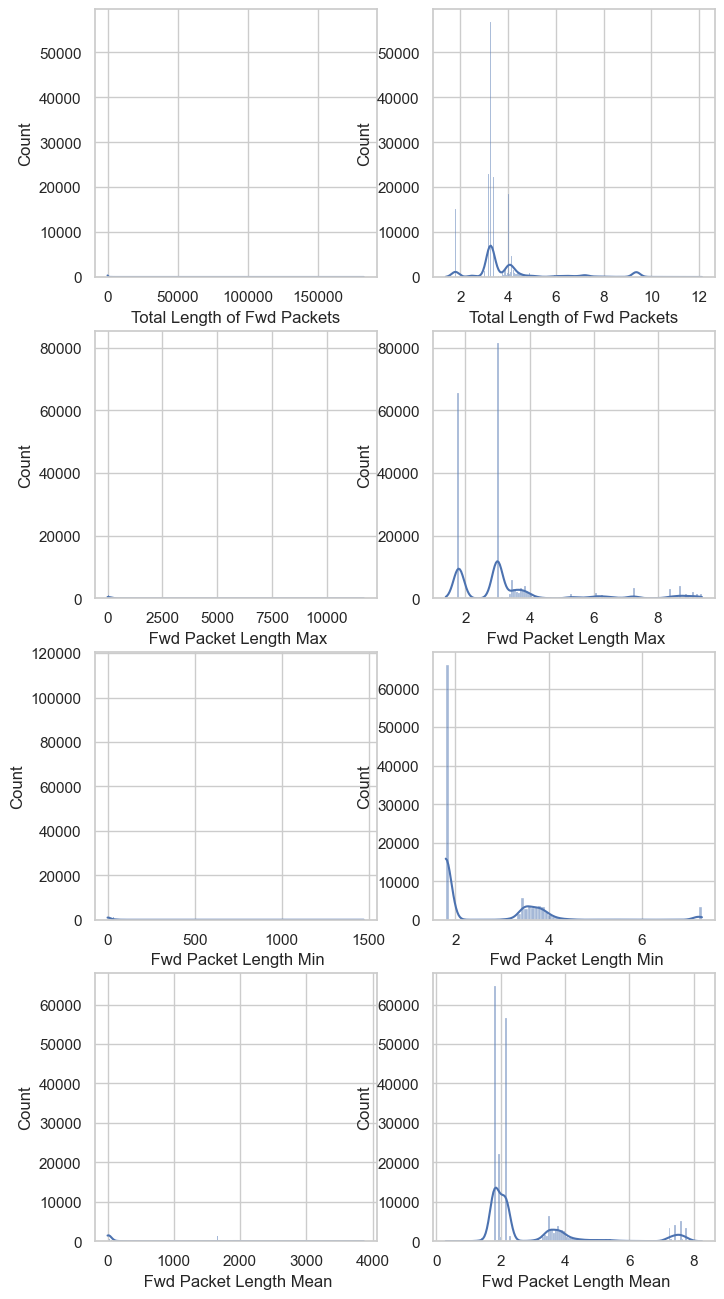

In [48]:
fig, axs = plt.subplots(4, 2, figsize=(8, 16))

for i in range(0,4):
    dato_sqrt =np.log(data[positively_skewed_cols[i]])
    sns.histplot(data=data[positively_skewed_cols[i]], kde=True, ax=axs[i,0])
    sns.histplot(data=dato_sqrt, kde=True, ax=axs[i,1])
    data[positively_skewed_cols[i]] = dato_sqrt

#Square root transformation es la que mejor resultados da para Age
#Log transformation es la que mejor resultados da para el resto

c:\Users\acasalro\AppData\Local\miniconda3\envs\ia\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

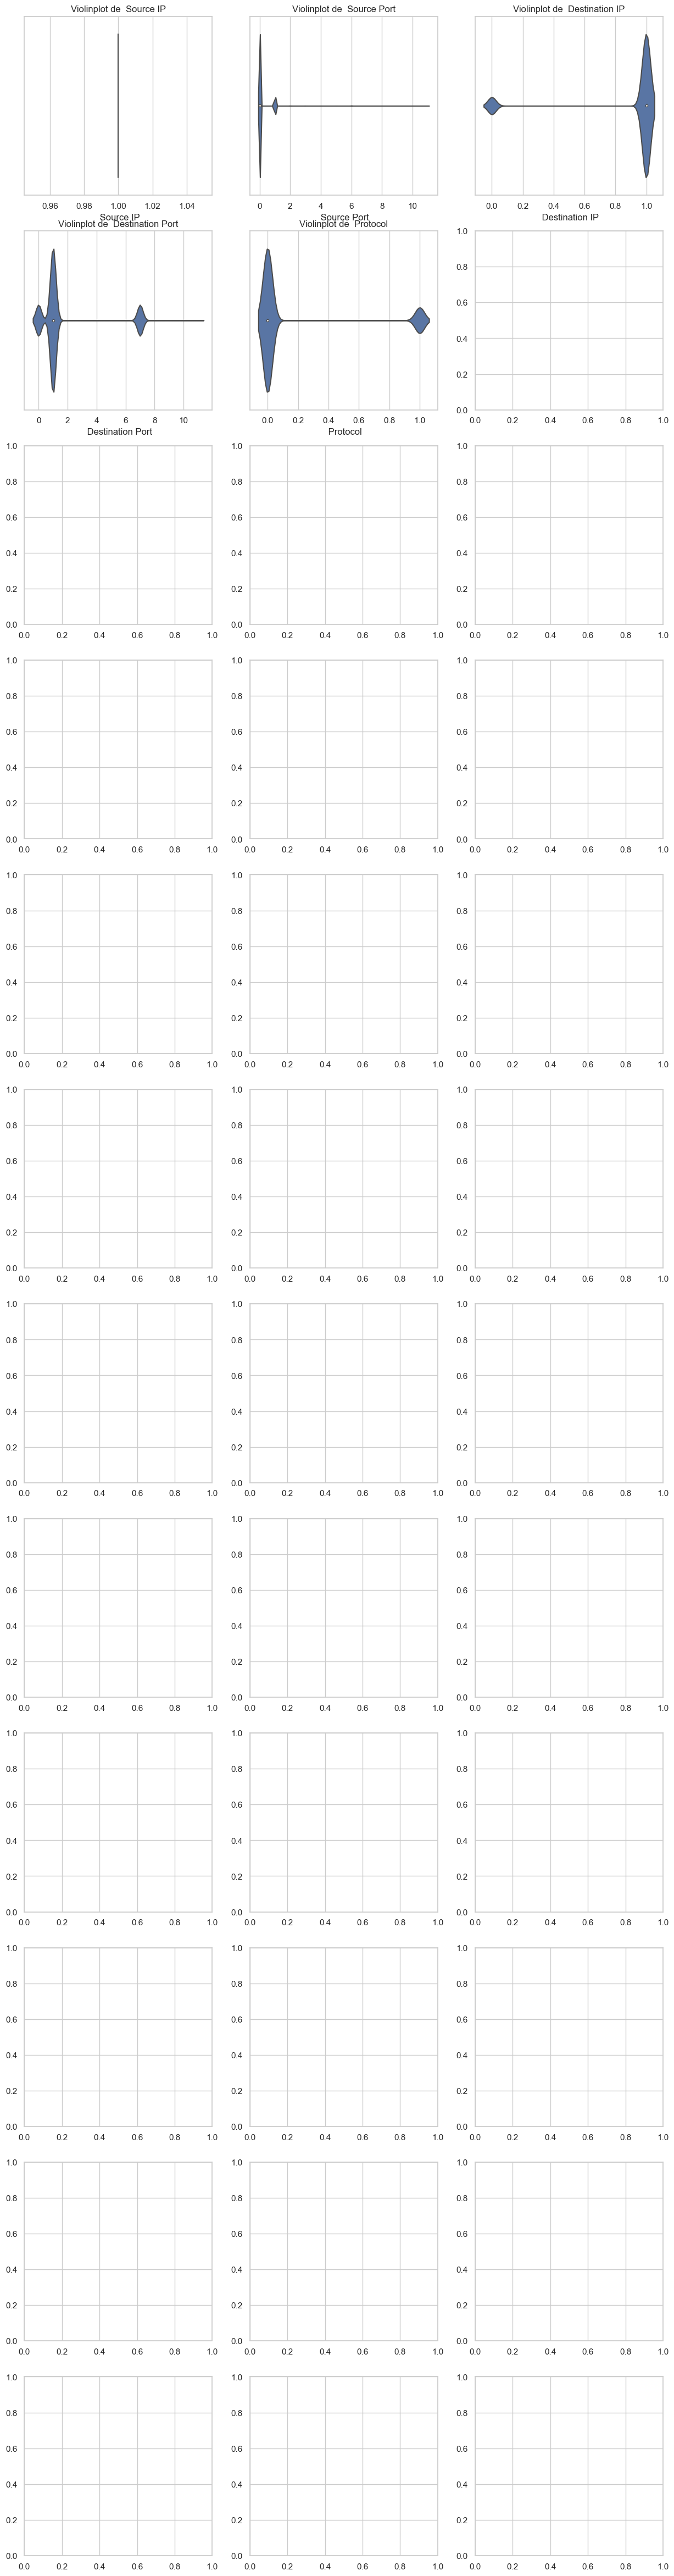

In [49]:
fig, axes = plt.subplots((len(data.columns) + 2) // 3, 3, figsize=(15, 5 * ((len(data.columns) + 2) // 3)))

# Grafica un violinplot para cada columna
for i, (col, ax) in enumerate(zip(data.columns, axes.flatten())):
    sns.violinplot(x=data[col], ax=ax)
    ax.set_title(f'Violinplot de {col}')

# Elimina las subparcelas vacías si la cantidad de columnas no es un múltiplo de 3
for i in range(len(data.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()